# **ENCS4310 Digital Signal Processing | Assignment 1**

**Prebared by:** Mohammad Abu-Shelbaia / 1200198

---


#### $x[n]$ Plot for $f_s$ = 160 samples/s
$$
x(n) = \cos(4\pi n) + 0.5\cos(100\pi n) + 0.25\cos(160\pi n)
$$

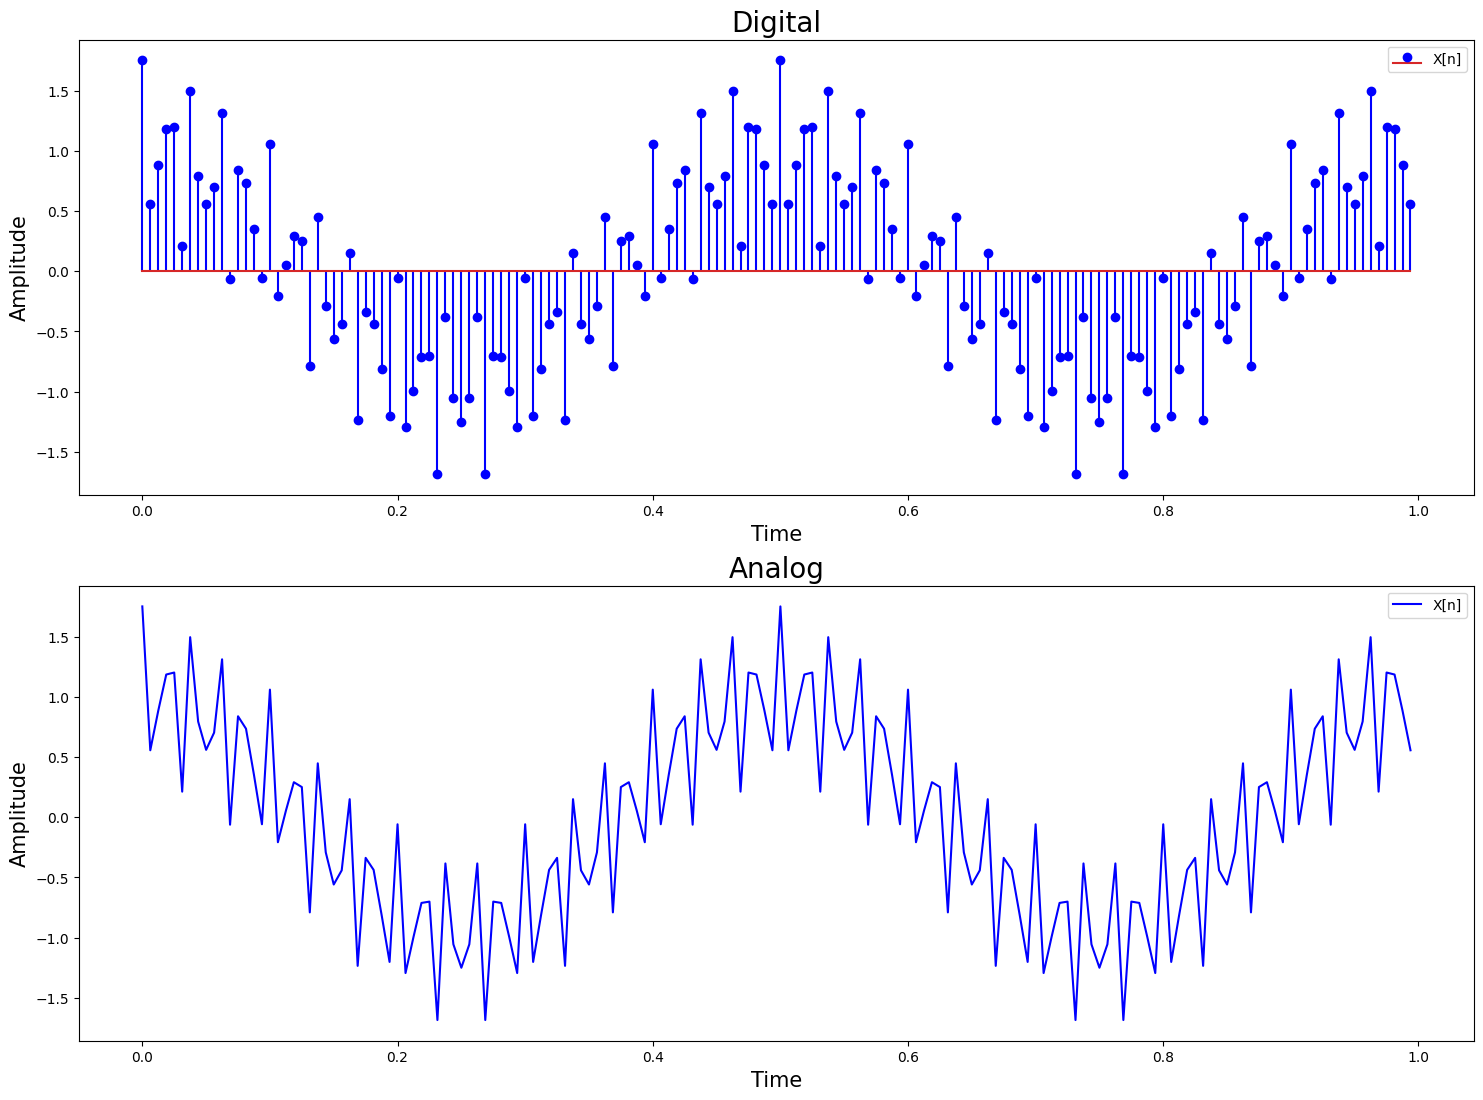

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
Fs = 160
size = (18, 13)
n = np.arange(0, 1, 1/Fs)
x = np.cos(2 * math.pi * 2 * n) + 0.5 * np.cos(2 * math.pi * 50 * n) + 0.25 * np.cos(2 * math.pi * 80 * n)
plt.figure(figsize = size)
plt.subplot(2,1,1)
plt.title('Digital', fontsize=20)
plt.stem(n, x, 'b', label='X[n]', )
plt.xlabel('Time' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
_ = plt.legend(loc='upper right')
plt.subplot(2,1,2)
plt.title('Analog', fontsize=20)
plt.plot(n, x, 'b', label='X[n]', )
plt.xlabel('Time' , fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
_ = plt.legend(loc='upper right')

<p style="page-break-after:always;"></p>

#### Frequency Response of the moving average filter 
$$
y[n] = {1 \over {M+1}}\times\sum_{k=0}^{M} x[n-k]
$$

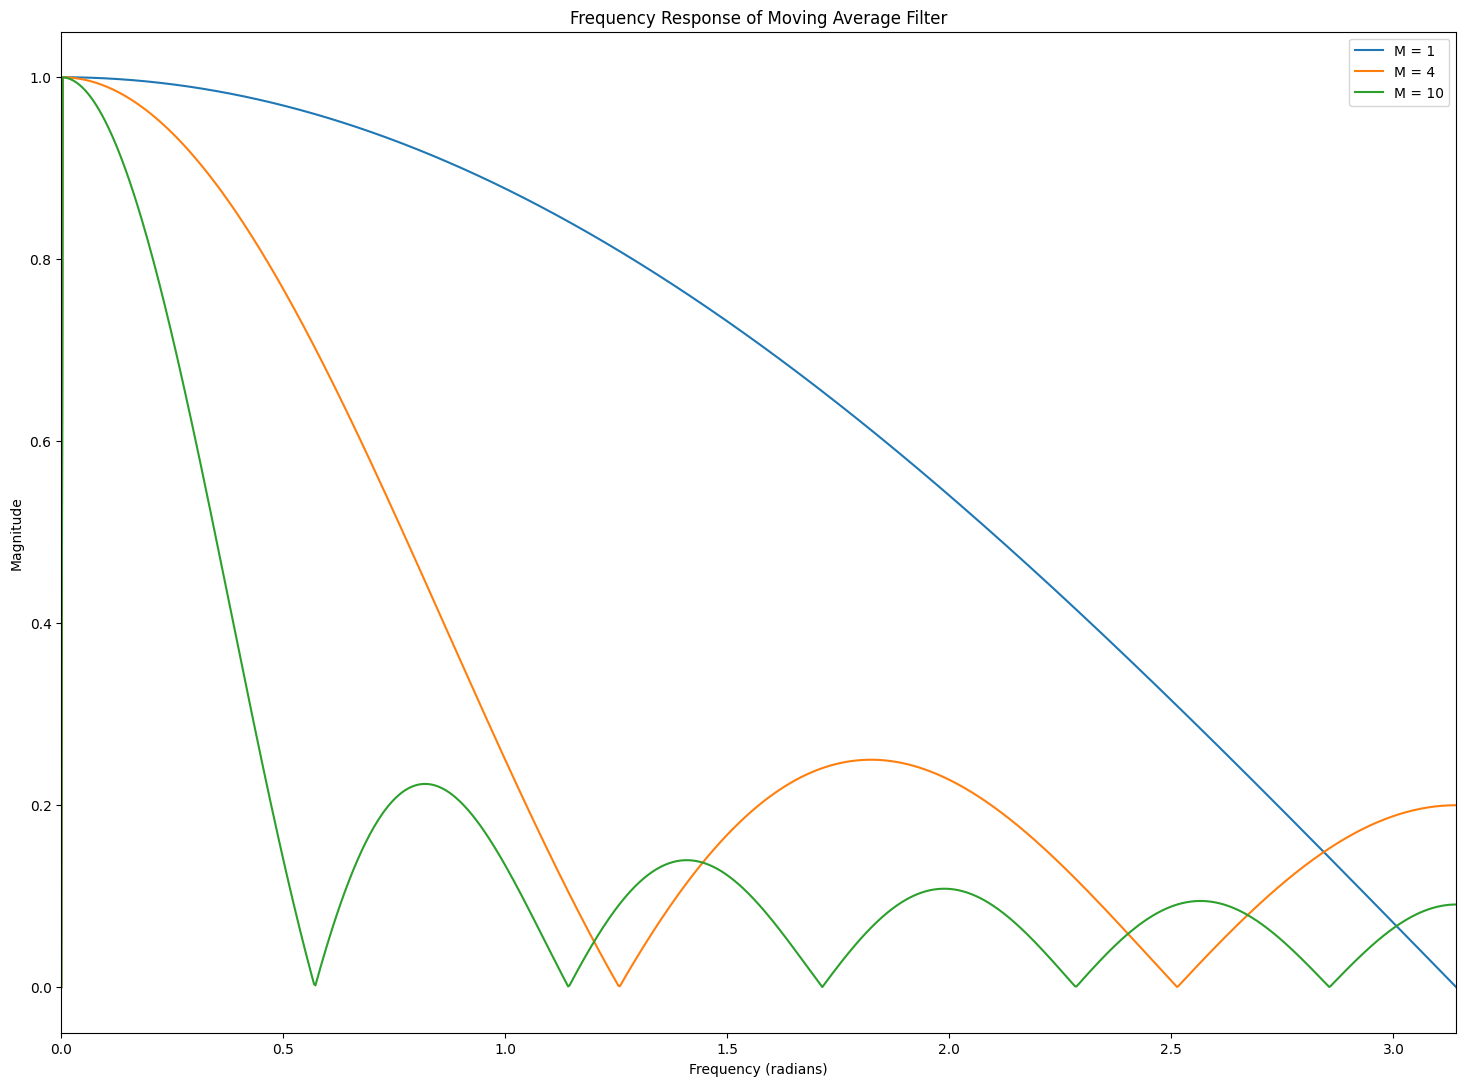

In [3]:

w = np.linspace(0, np.pi, 1000)
y = [] 
plt.figure(figsize=size)
for M in [1, 4, 10]:
    H = np.zeros_like(w)
    for i in range(1, len(w)):
        H[i] = np.abs(1 / (M+1) * np.sum(np.exp(-1j*w[i]*np.arange(M+1))))
    plt.plot(w, np.abs(H), label='M = {}'.format(M))

plt.title('Frequency Response of Moving Average Filter')
plt.xlabel('Frequency (radians)')
plt.ylabel('Magnitude')
plt.xlim(0, np.pi)
plt.legend()

# Show the plot
plt.show()


<p style="page-break-after:always;"></p>

#### y[n] for M = [1, 4, 10]

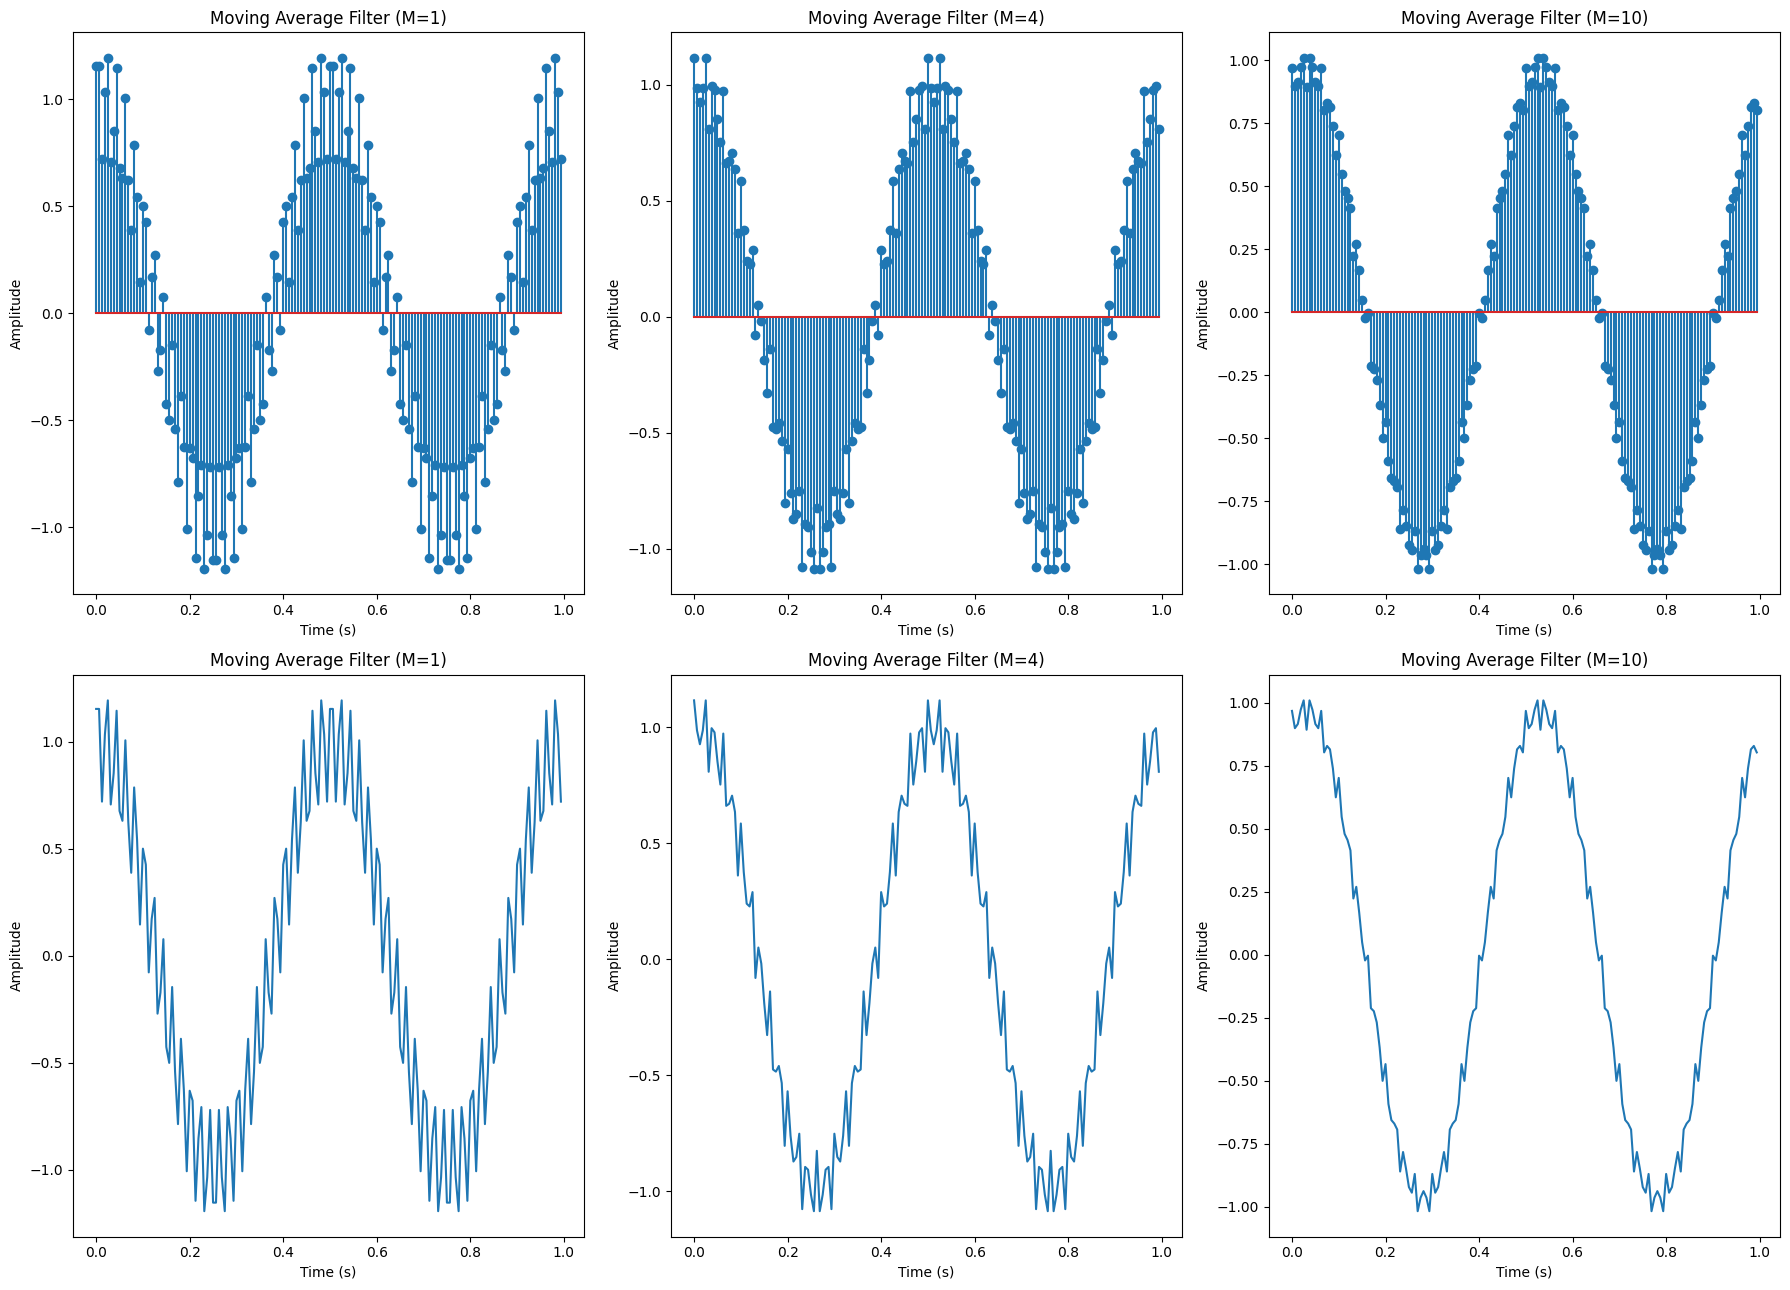

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=size)
Y_array = []
for i, M in enumerate([1, 4, 10]):
    y = np.zeros(len(x))
    for j in range(len(x)):
        for k in range(M+1):
            y[j] += x[j - k] 
        y[j] /= (M+1)
    Y_array.append(y)
    axs[1,i].plot(n, y, label='Moving Average Filter (M={})'.format(M))
    axs[1,i].set_xlabel('Time (s)')
    axs[1,i].set_ylabel('Amplitude')
    axs[1,i].set_title('Moving Average Filter (M={})'.format(M))
    
    axs[0,i].stem(n, y, label='Moving Average Filter (M={})'.format(M))
    axs[0,i].set_xlabel('Time (s)')
    axs[0,i].set_ylabel('Amplitude')
    axs[0,i].set_title('Moving Average Filter (M={})'.format(M))
plt.tight_layout()
plt.show()

<p style="page-break-after:always;"></p>


#### Input & Output Frequency Response

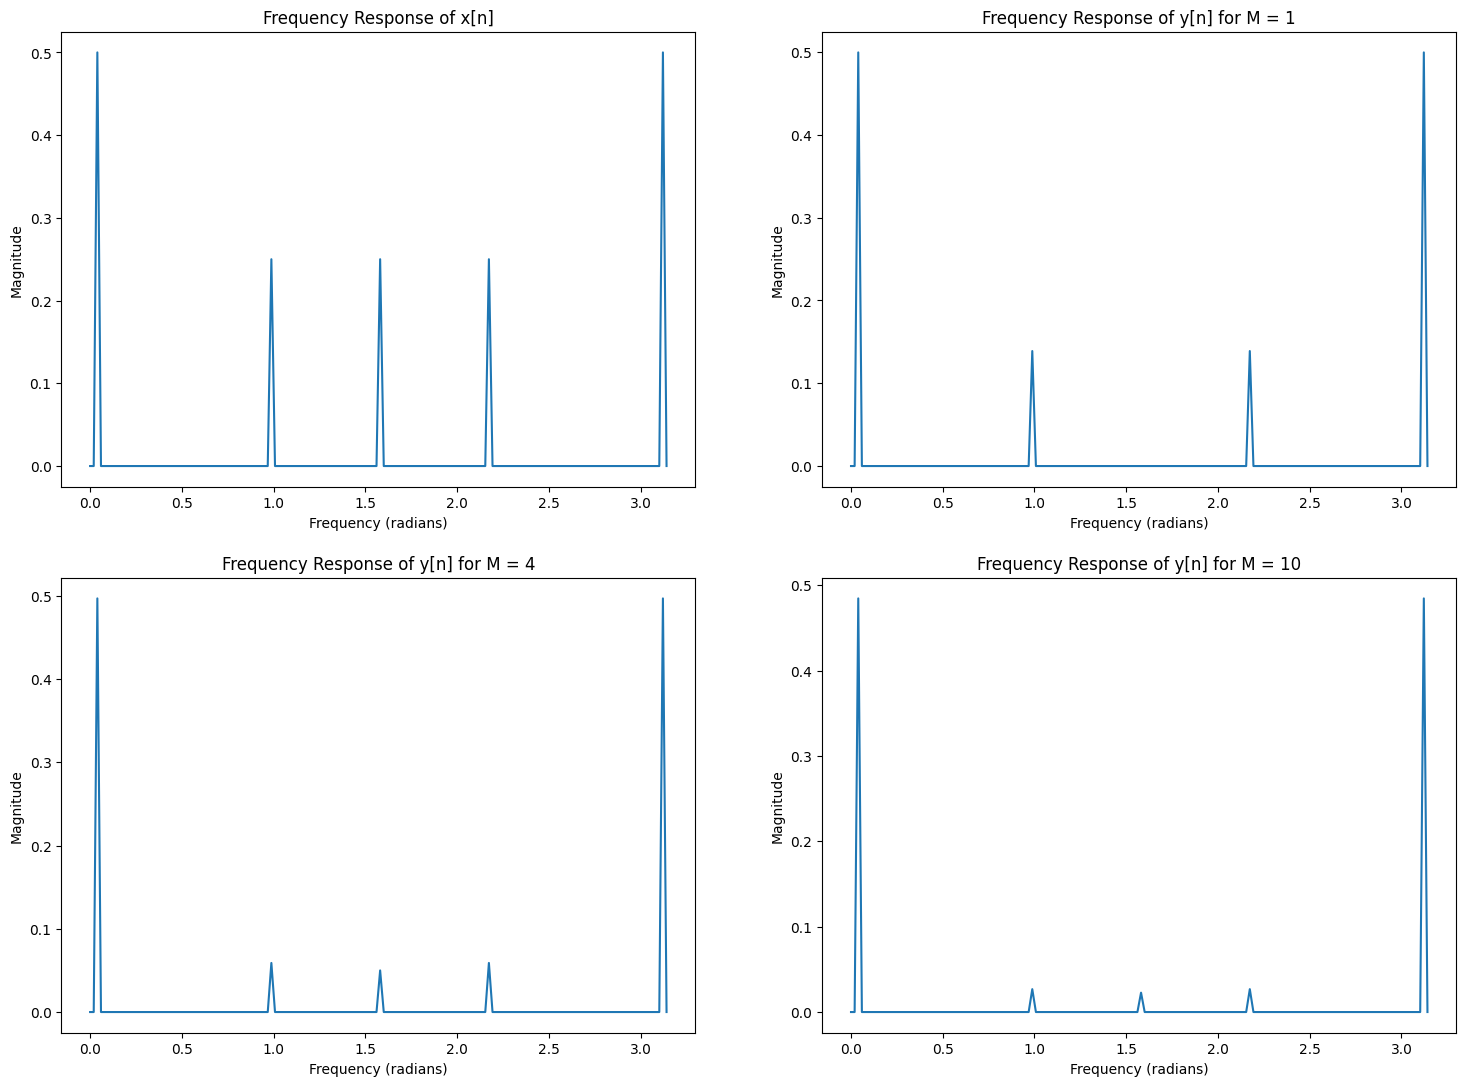

In [5]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=size)
X =  np.abs(np.fft.fft(x))  / 160
Y = [np.abs(np.fft.fft(_))  / 160 for _ in Y_array]
axs[0,0].plot(np.linspace(0, np.pi, len(x)), X)
axs[0,0].set_title('Frequency Response of x[n]')
axs[0,0].set_xlabel('Frequency (radians)')
axs[0,0].set_ylabel('Magnitude')
axs[0,1].plot(np.linspace(0, np.pi, len(Y[0])), Y[0])
axs[0,1].set_title('Frequency Response of y[n] for M = 1')
axs[0,1].set_xlabel('Frequency (radians)')
axs[0,1].set_ylabel('Magnitude')
axs[1,0].plot(np.linspace(0, np.pi, len(Y[1])), Y[1])
axs[1,0].set_title('Frequency Response of y[n] for M = 4')
axs[1,0].set_xlabel('Frequency (radians)')
axs[1,0].set_ylabel('Magnitude')
axs[1,1].plot(np.linspace(0, np.pi, len(Y[2])), Y[2])
axs[1,1].set_title('Frequency Response of y[n] for M = 10')
axs[1,1].set_xlabel('Frequency (radians)')
_ = axs[1,1].set_ylabel('Magnitude')


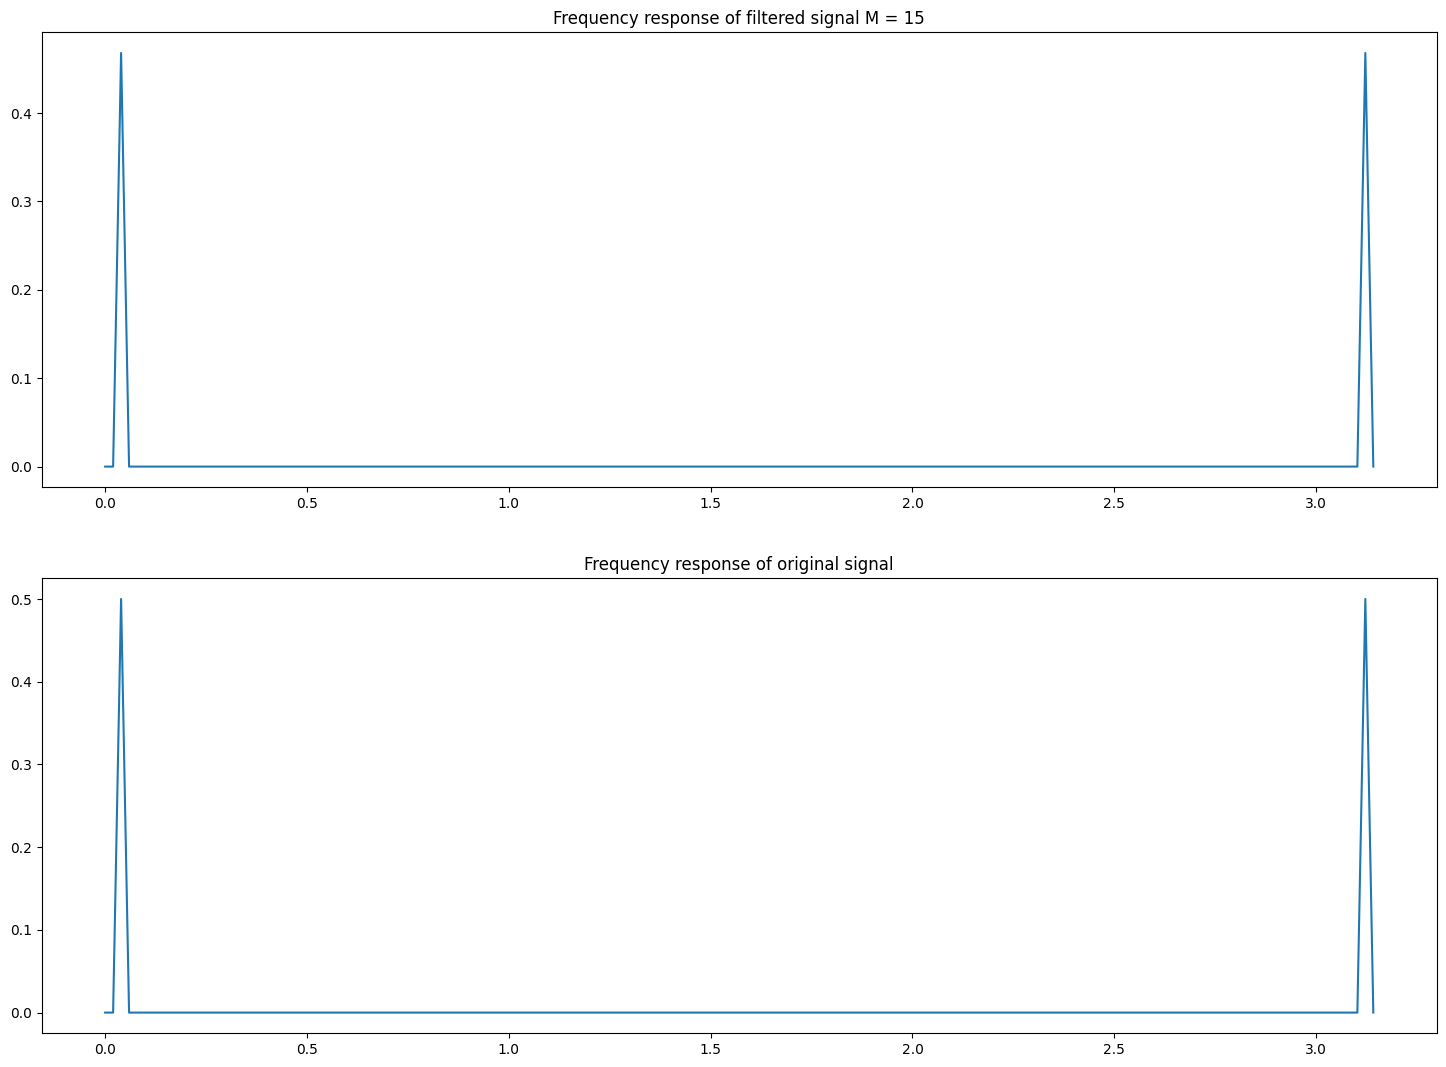

In [6]:
M = 15

y = np.zeros(len(x))
for j in range(len(x)):
    for k in range(M+1):
        y[j] += x[j - k] 
    y[j] /= (M+1)

z = np.cos(4 * np.pi * n)

Y = np.abs(np.fft.fft(y)) / 160
Z = np.abs(np.fft.fft(z)) / 160

fig, axs = plt.subplots(2, 1, figsize=size)

axs[0].plot(np.linspace(0, np.pi, len(Y)), Y)
axs[0].set_title('Frequency response of filtered signal M = 15')

axs[1].plot(np.linspace(0, np.pi, len(Z)), Z)
axs[1].set_title('Frequency response of original signal')

plt.show()


#### Conclusion: Best M = 15